# OLA EV DATA ANALYSIS


In [1]:

# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('Bookings-20000-Rows.xlsx', sheet_name='July')

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20407 entries, 0 to 20406
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        20407 non-null  datetime64[ns]
 1   Time                        20407 non-null  object        
 2   Booking_ID                  20407 non-null  object        
 3   Booking_Status              20407 non-null  object        
 4   Customer_ID                 20407 non-null  object        
 5   Vehicle_Type                20407 non-null  object        
 6   Pickup_Location             20407 non-null  object        
 7   Drop_Location               20407 non-null  object        
 8   V_TAT                       12652 non-null  float64       
 9   C_TAT                       12652 non-null  float64       
 10  Canceled_Rides_by_Customer  2081 non-null   object        
 11  Canceled_Rides_by_Driver    3654 non-null   object    

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


### 1. Data Profiling and Initial Observations

In [2]:

# Checking missing values and basic stats
missing_data = df.isnull().sum()
print("Missing Values per Column:\n", missing_data)

# Summary statistics for numerical columns
df.describe()


Missing Values per Column:
 Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                          7755
C_TAT                          7755
Canceled_Rides_by_Customer    18326
Canceled_Rides_by_Driver      16753
Incomplete_Rides               7755
Incomplete_Rides_Reason       19612
Booking_Value                     0
Payment_Method                 7755
Ride_Distance                     0
Driver_Ratings                 7755
Customer_Rating                7755
Vehicle Images                    0
dtype: int64


,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,20407,12652.000000,12652.000000,20407.000000,20407.000000,12652.000000,12652.000000
mean,2024-07-15 23:51:58.418189824,170.640768,85.183765,546.316019,14.160386,3.997479,3.993772
min,2024-07-01 00:02:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 12:42:00,98.000000,55.000000,240.000000,0.000000,3.500000,3.500000
50%,2024-07-15 23:58:00,168.000000,85.000000,384.000000,8.000000,4.000000,4.000000
75%,2024-07-23 12:07:30,238.000000,115.000000,623.000000,27.000000,4.500000,4.500000
max,2024-07-30 23:56:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.657316,35.993634,533.593923,15.827246,0.576357,0.581111


### 2. Booking Outcome Analysis

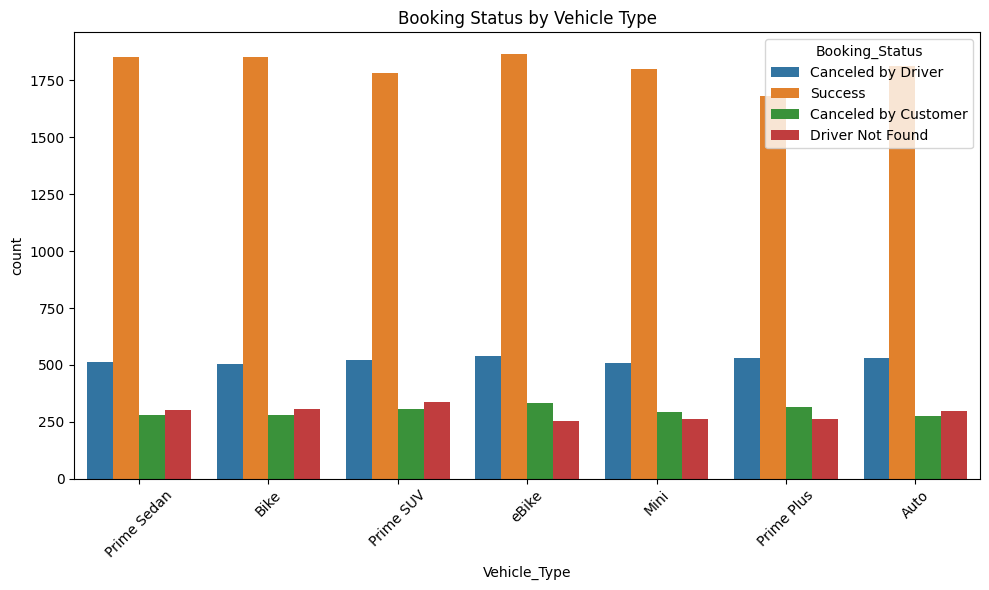

In [3]:

# Booking Status by Vehicle Type
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Vehicle_Type', hue='Booking_Status')
plt.title('Booking Status by Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. Ride Distance vs Booking Value

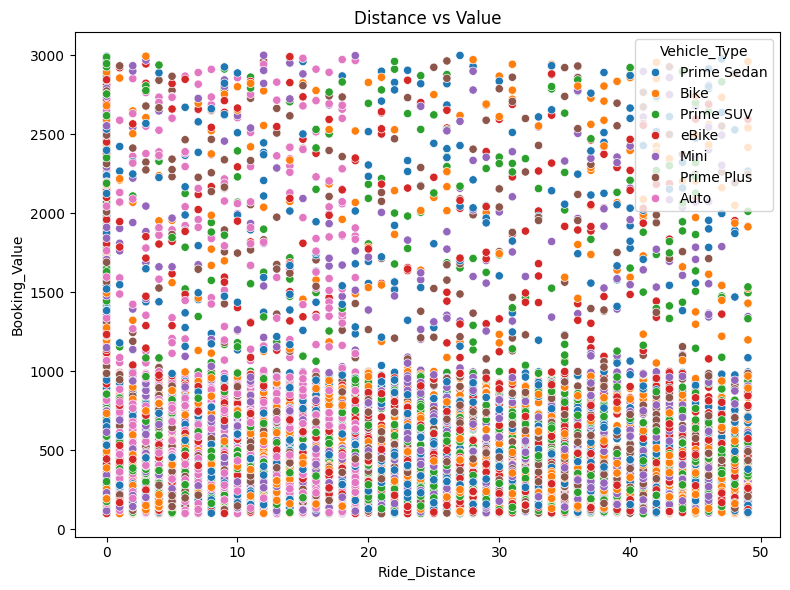

In [4]:

# Scatterplot of Ride Distance vs Booking Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Ride_Distance', y='Booking_Value', hue='Vehicle_Type')
plt.title('Distance vs Value')
plt.tight_layout()
plt.show()


### 4. Customer Behavior Profiling

In [5]:

# Aggregating cancellation rates per customer
customer_behavior = df.groupby('Customer_ID')['Booking_Status'].value_counts().unstack(fill_value=0)
customer_behavior['Total'] = customer_behavior.sum(axis=1)
customer_behavior['Cancel_Rate'] = customer_behavior.get('Canceled by Customer', 0) / customer_behavior['Total']
customer_behavior.sort_values('Cancel_Rate', ascending=False).head()


Booking_Status,Canceled by Customer,Canceled by Driver,Driver Not Found,Success,Total,Cancel_Rate
Customer_ID,,,,,,
CID764401,1,0,0,0,1,1.0
CID412700,1,0,0,0,1,1.0
CID190654,1,0,0,0,1,1.0
CID190755,1,0,0,0,1,1.0
CID720182,1,0,0,0,1,1.0


### 5. Driver Ratings by Vehicle Type

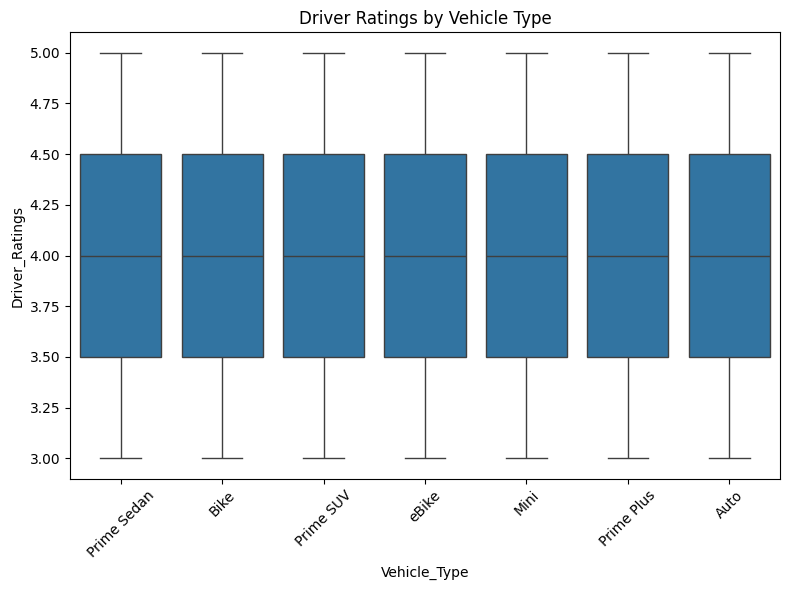

In [6]:

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Vehicle_Type', y='Driver_Ratings')
plt.title('Driver Ratings by Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6. Time-based Booking Patterns

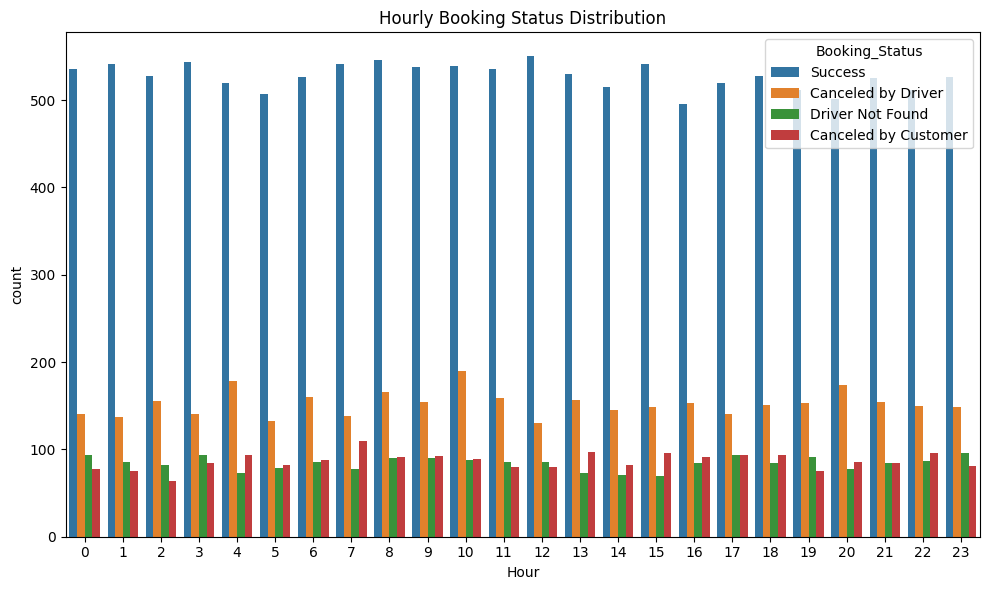

In [7]:

df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Hour', hue='Booking_Status')
plt.title('Hourly Booking Status Distribution')
plt.tight_layout()
plt.show()


### 7. Payment Method Trends & Revenue Insights

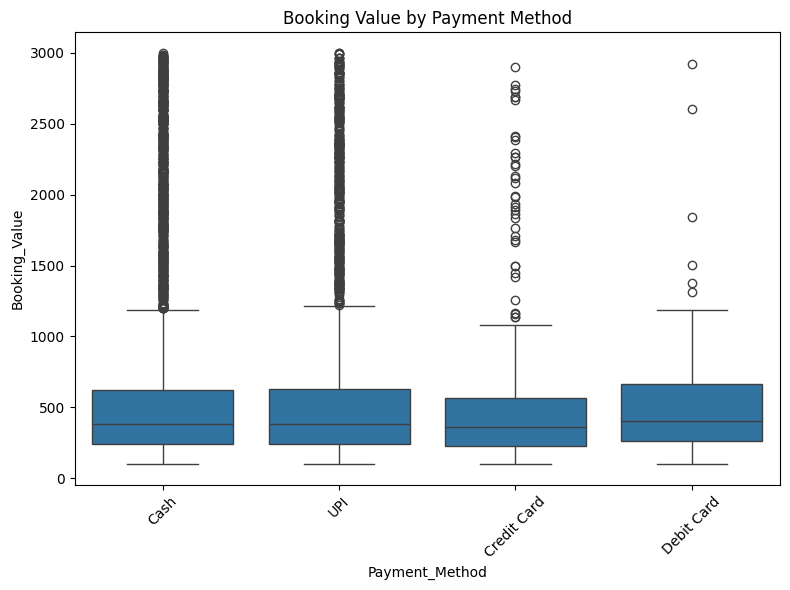

In [8]:

# Average Booking Value by Payment Method
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Payment_Method', y='Booking_Value')
plt.title('Booking Value by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Cleaning


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel("Bookings-20000-Rows.xlsx", sheet_name="July")

# -------------------------------
# 1. CLEANING
# -------------------------------

# Drop irrelevant column
df.drop(columns=["Vehicle Images"], inplace=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop duplicate Booking_IDs
df.drop_duplicates(subset='Booking_ID', inplace=True)

# Drop rows with missing essential fields
df.dropna(subset=['Date'], inplace=True)

# Fill missing numerical values with median
for col in ['V_TAT', 'C_TAT', 'Driver_Ratings', 'Customer_Rating']:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values
df['Payment_Method'] = df['Payment_Method'].fillna('Unknown')

# Encodings


In [10]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['Booking_Status', 'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'Payment_Method']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Outlier Removal

In [11]:
#OUTLIER REMOVAL
# -------------------------------

# Define numeric columns
numeric_cols = ['Booking_Value', 'Ride_Distance', 'V_TAT', 'C_TAT', 'Driver_Ratings', 'Customer_Rating']

# Remove outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# NORMALIZATION

In [12]:
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


#  CORRELATION ANALYSIS

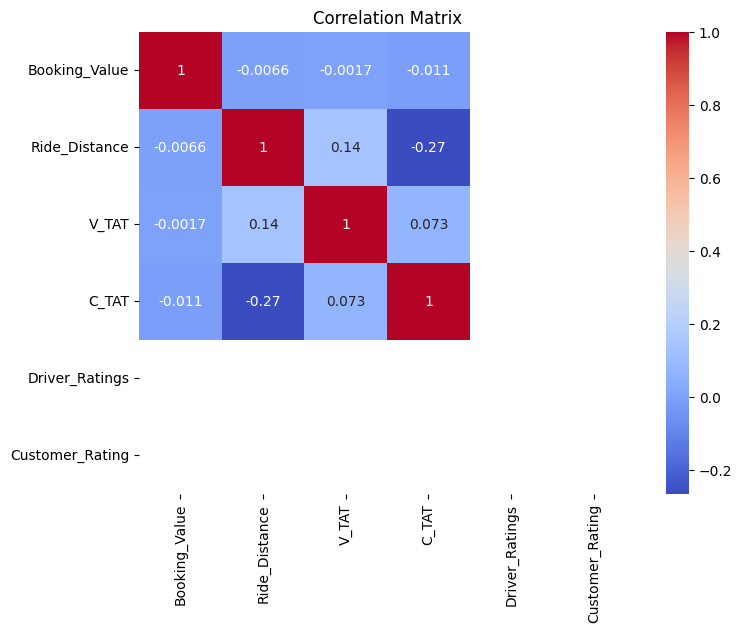

In [13]:
# Correlation matrix
corr = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#  FEATURE ENGINEERING

In [14]:
# Extract additional features from datetime
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

# Optional: One-hot encode new time-based features
df = pd.get_dummies(df, columns=['Weekday'], drop_first=True)

#  CUSTOMER CLUSTERING (KMeans)

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Choose clustering features
clustering_features = ['Booking_Value', 'Ride_Distance', 'V_TAT', 'C_TAT', 
                       'Driver_Ratings', 'Customer_Rating']

In [16]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[clustering_features])

In [17]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[clustering_features])
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]


# Advanced Visual Insights

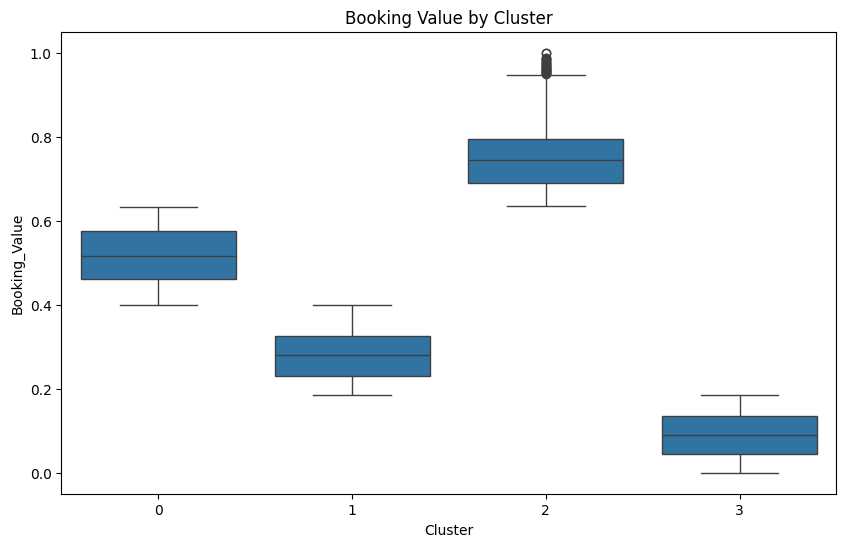

In [18]:
# Booking value by cluster
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Cluster', y='Booking_Value')
plt.title('Booking Value by Cluster')
plt.show()

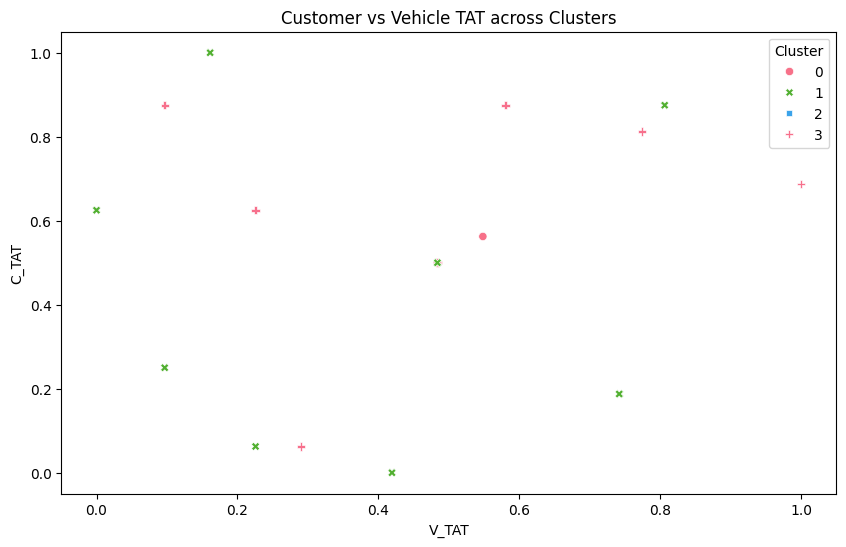

In [19]:
# Ride distance vs TAT (Driver vs Customer)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='V_TAT', y='C_TAT', hue='Cluster', style='Cluster', palette='husl')
plt.title('Customer vs Vehicle TAT across Clusters')
plt.show()

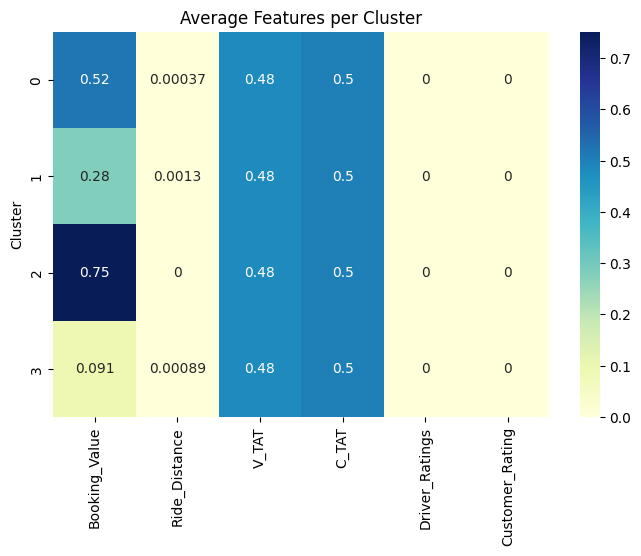

In [20]:
# Heatmap of cluster-wise average metrics
cluster_summary = df.groupby('Cluster')[clustering_features].mean()
plt.figure(figsize=(8,5))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu')
plt.title("Average Features per Cluster")
plt.show()

# Anomaly Detection using Z-Score

In [21]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df[clustering_features]))
df['Anomaly'] = (z_scores > 3).any(axis=1)

In [22]:
# Count anomalies
print("Anomalies detected:", df['Anomaly'].sum())

Anomalies detected: 50


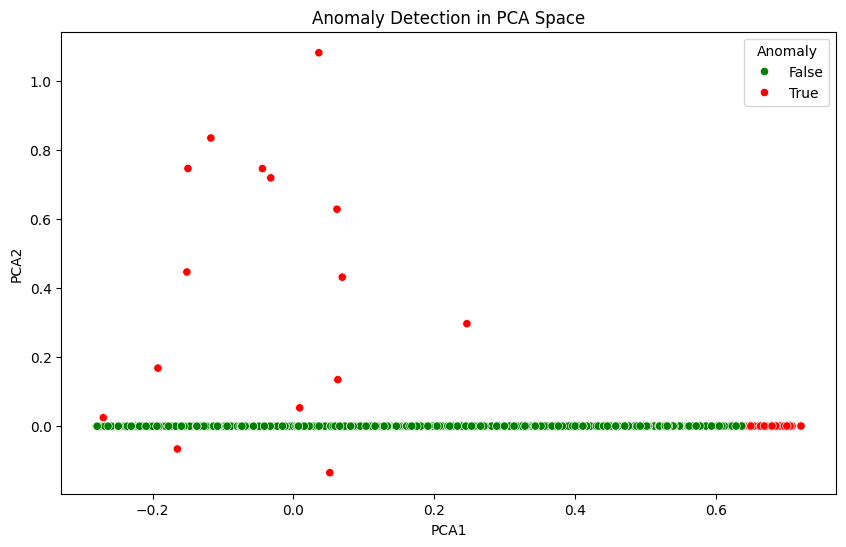

In [23]:
# Visualize anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Anomaly', palette={True:'red', False:'green'})
plt.title('Anomaly Detection in PCA Space')
plt.show()